In [64]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [65]:
def fft(data, nn, isign):
    n = len(data)
    if n < nn * 2:
        data.extend([0.0] * (nn * 2 - n))

    n = nn << 1
    j = 0
    for i in range(0, n, 2):
        if j > i:
            data[j], data[i] = data[i], data[j]  
            data[j+1], data[i+1] = data[i+1], data[j+1] 
        m = n >> 1
        while m >= 2 and j >= m:
            j -= m
            m >>= 1
        j += m

    mmax = 2
    while n > mmax:
        istep = mmax << 1
        theta = -isign * (2 * np.pi / mmax)
        wtemp = np.sin(0.5 * theta)
        wpr = -2.0 * wtemp * wtemp
        wpi = np.sin(theta)
        wr = 1.0
        wi = 0.0
        for m in range(0, mmax, 2):
            for i in range(m, n, istep):
                j = i + mmax
                if j < n:  
                    tempr = wr * data[j] - wi * data[j+1]
                    tempi = wr * data[j+1] + wi * data[j]
                    data[j] = data[i] - tempr
                    data[j+1] = data[i+1] - tempi
                    data[i] += tempr
                    data[i+1] += tempi
            wr_temp = wr * wpr - wi * wpi + wr
            wi = wi * wpr + wr * wpi + wi
            wr = wr_temp
        mmax = istep

    if isign == 1:
        factor = 1.0 / nn
        for i in range(n):
            data[i] *= factor



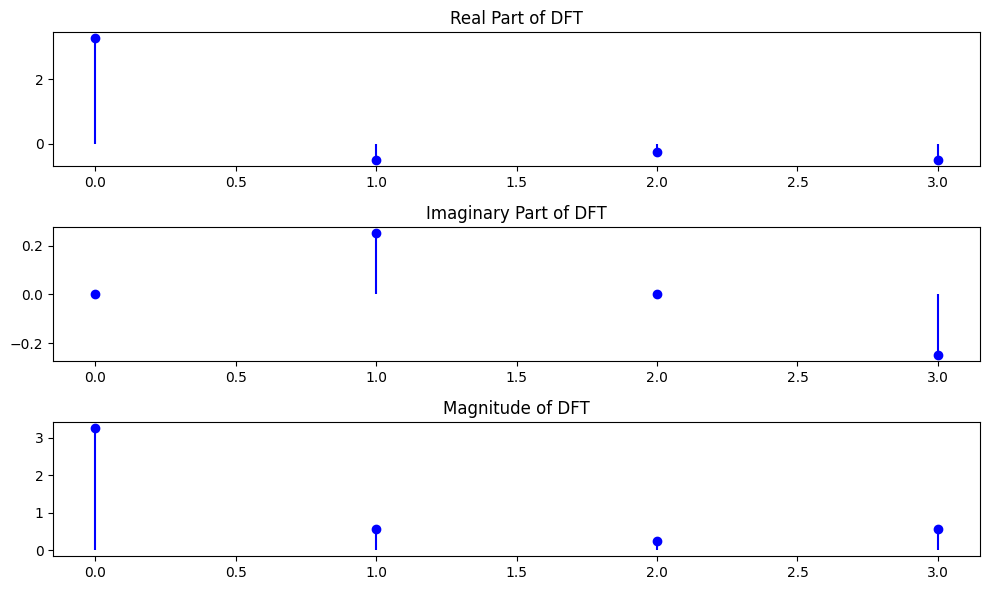

In [66]:
f = [2, 3, 4, 4]
nn = 2 ** np.ceil(np.log2(len(f)))  
data = [value for pair in zip(f, [0.0]*len(f)) for value in pair]  
fft(data, int(nn), 1)

real_part = data[0::2]
imag_part = data[1::2]
magnitudes = np.sqrt(np.square(real_part) + np.square(imag_part))


fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].stem(real_part, linefmt='b-', basefmt=" ")


axs[0].set_title('Real Part of DFT')

axs[1].stem(imag_part, linefmt='b-', basefmt=" ")

axs[1].set_title('Imaginary Part of DFT')

axs[2].stem(magnitudes, linefmt='b-', basefmt=" ")

axs[2].set_title('Magnitude of DFT')

plt.tight_layout()
plt.show()

fft(data, int(nn), -1)
reconstructed_signal = data[0::2]



#### PHASE IS WRONG

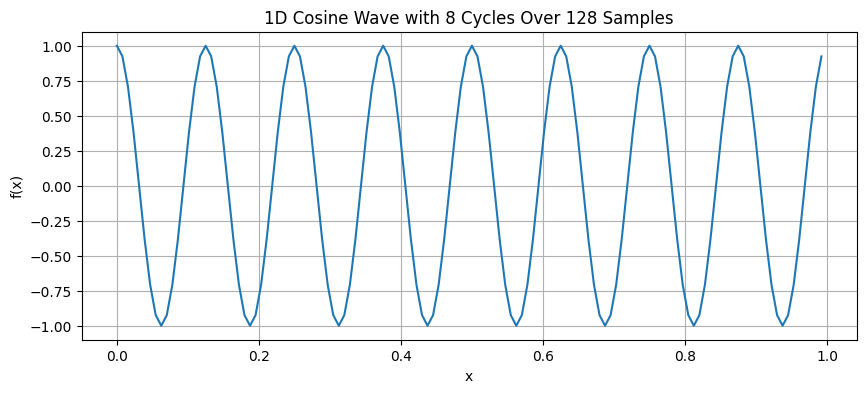

Maximum absolute value in the imaginary part: 5.596149958608907e-16


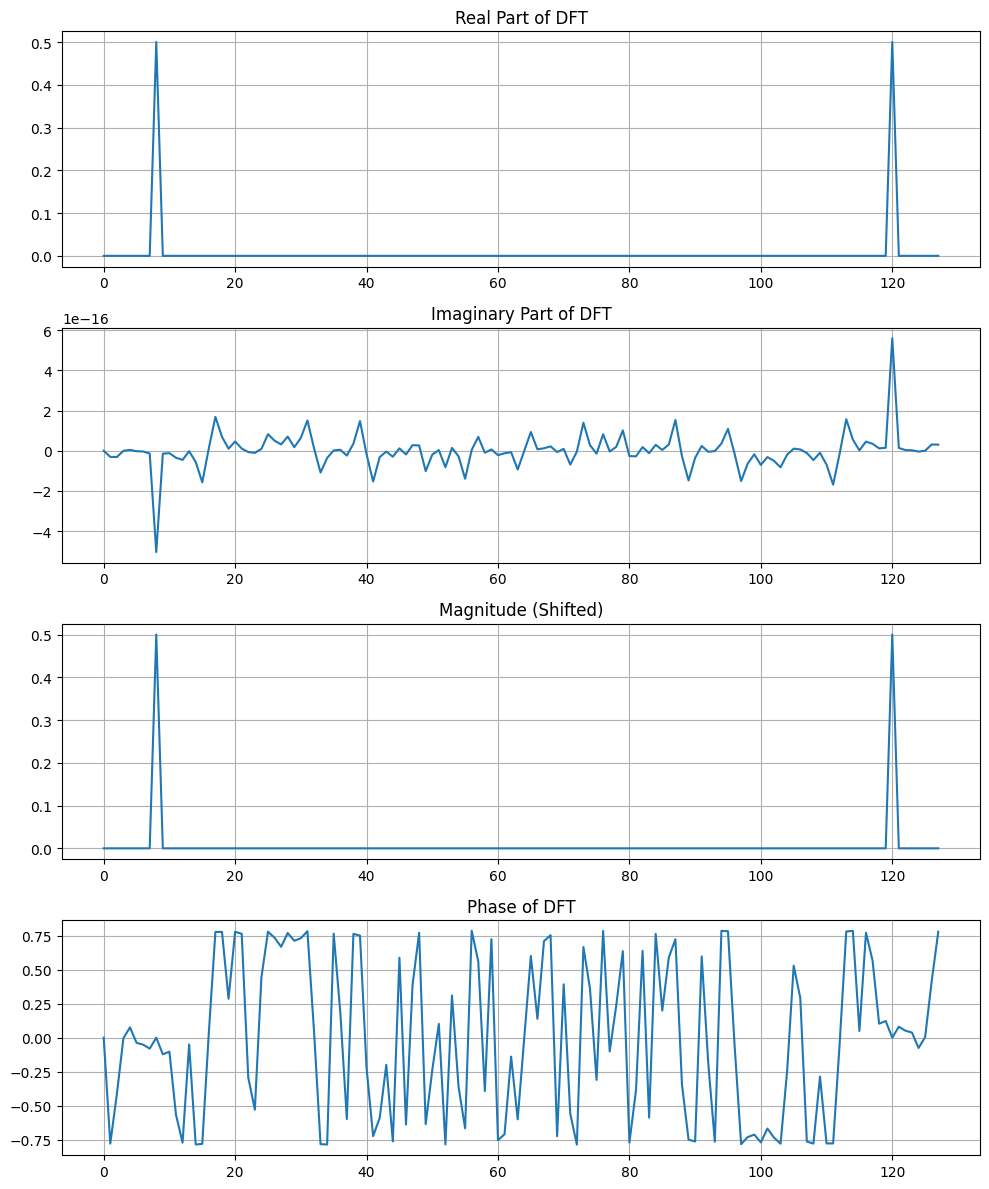

In [67]:
u = 8  
N = 128  

x = np.linspace(0, 1, N, endpoint=False)  
cosine_wave = np.cos(2 * np.pi * u * x)

plt.figure(figsize=(10, 4))
plt.plot(x, cosine_wave)
plt.title('1D Cosine Wave with 8 Cycles Over 128 Samples')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

data = [value for pair in zip(cosine_wave, [0.0]*N) for value in pair]
fft(data, N, 1)

real_part = data[0::2]
imag_part = data[1::2]
max_imag = np.max(np.abs(imag_part))
print("Maximum absolute value in the imaginary part:", max_imag)
magnitude = np.sqrt(np.square(real_part) + np.square(imag_part))
phase = np.arctan2(imag_part, magnitude)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

axs[0].plot(real_part)
axs[0].set_title('Real Part of DFT')
axs[0].grid(True)

axs[1].plot(imag_part)
axs[1].set_title('Imaginary Part of DFT')
axs[1].grid(True)

axs[2].plot(magnitude)
axs[2].set_title('Magnitude (Shifted)')
axs[2].grid(True)

axs[3].plot(phase)
axs[3].set_title('Phase of DFT')
axs[3].grid(True)

plt.tight_layout()
plt.show()

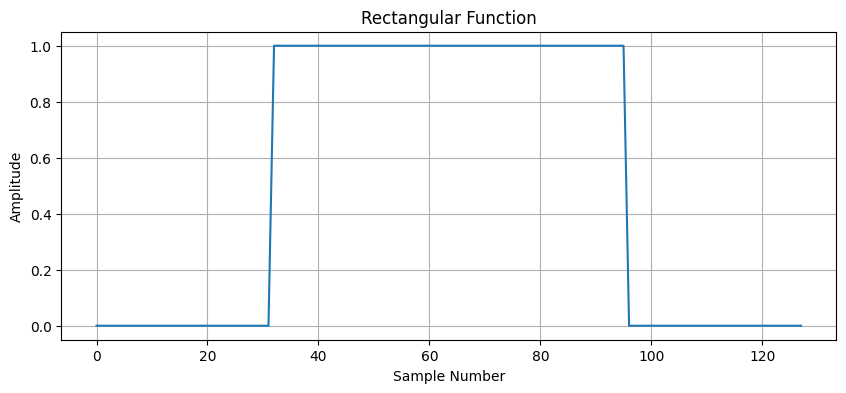

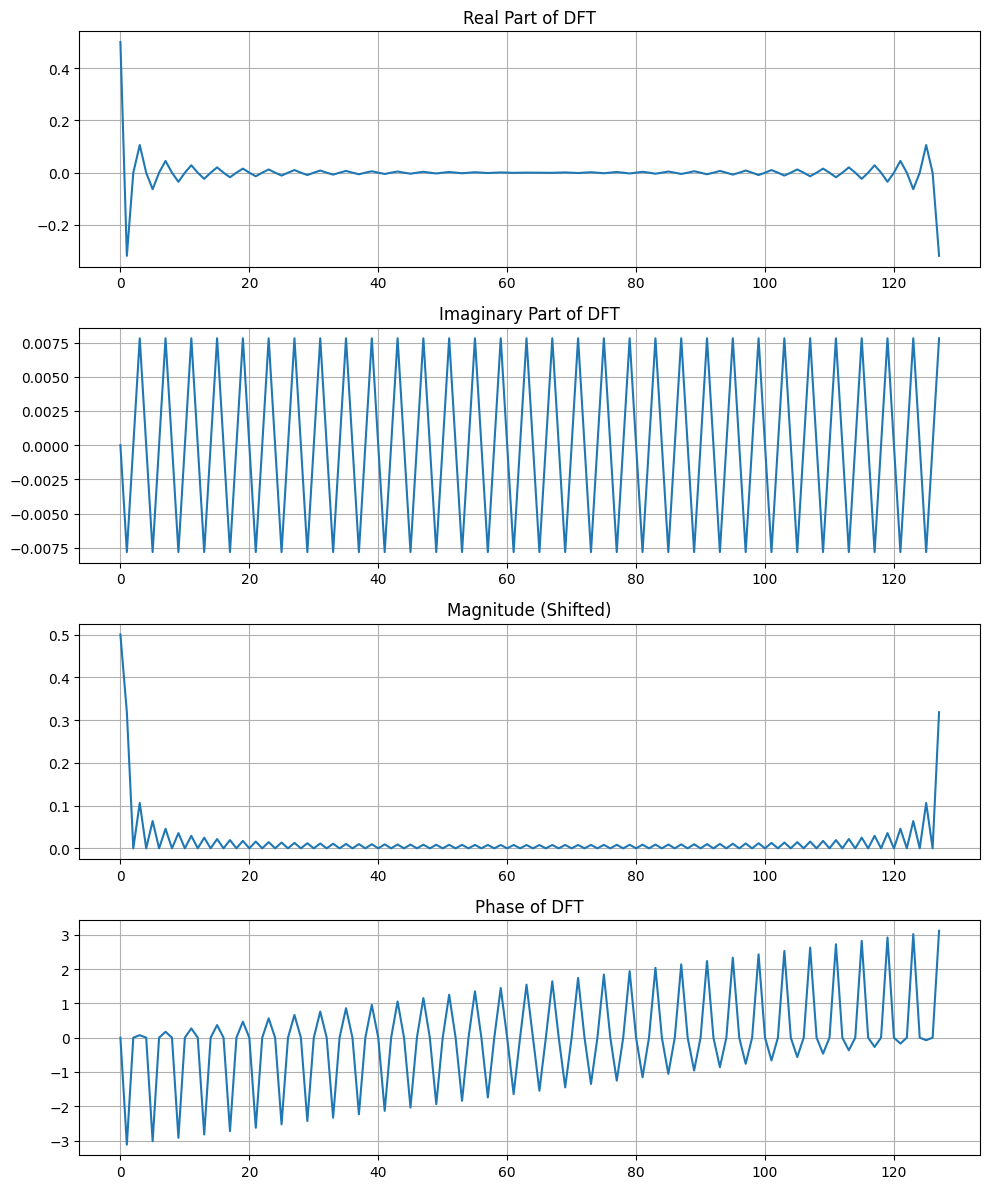

In [68]:
rect_data = np.loadtxt('Rect_128.txt')
plt.figure(figsize=(10, 4))
plt.plot(rect_data)
plt.title('Rectangular Function')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

data = [value for pair in zip(rect_data, [0.0]*len(rect_data)) for value in pair]
nn = 2 ** np.ceil(np.log2(len(rect_data))) 

fft(data, int(nn), 1)

real_part = data[0::2]
imag_part = data[1::2]
magnitude = np.sqrt(np.square(real_part) + np.square(imag_part))
phase = np.arctan2(imag_part, real_part)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

axs[0].plot(real_part)
axs[0].set_title('Real Part of DFT')
axs[0].grid(True)

axs[1].plot(imag_part)
axs[1].set_title('Imaginary Part of DFT')
axs[1].grid(True)

axs[2].plot(magnitude)
axs[2].set_title('Magnitude (Shifted)')
axs[2].grid(True)

axs[3].plot(phase)
axs[3].set_title('Phase of DFT')
axs[3].grid(True)

plt.tight_layout()
plt.show()

In [69]:

def fft2D(N, M, real_data, imag_data, isign):
    for row in range(N):
        data = [val for pair in zip(real_data[row], imag_data[row]) for val in pair]
        fft(data, M, isign)
        real_data[row], imag_data[row] = data[0::2], data[1::2]

    for col in range(M):
        data = [val for pair in zip(real_data[:, col], imag_data[:, col]) for val in pair]
        fft(data, N, isign)
        real_data[:, col], imag_data[:, col] = data[0::2], data[1::2]

    return real_data, imag_data



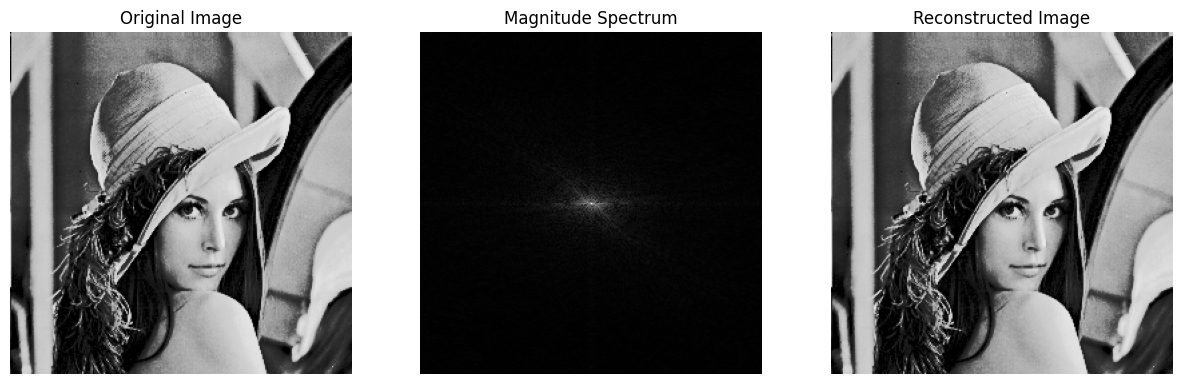

In [70]:
img = Image.open('lenna.pgm')
img_array = np.array(img)

def fft2D(N, M, real_data, imag_data, isign):
    for row in range(N):
        data = [val for pair in zip(real_data[row], imag_data[row]) for val in pair]
        fft(data, M, isign)
        real_data[row], imag_data[row] = data[0::2], data[1::2]

    for col in range(M):
        data = [val for pair in zip(real_data[:, col], imag_data[:, col]) for val in pair]
        fft(data, N, isign)
        real_data[:, col], imag_data[:, col] = data[0::2], data[1::2]

    return real_data, imag_data

real_Fuv, imag_Fuv = fft2D(img_array.shape[0], img_array.shape[1], img_array.astype(float), np.zeros_like(img_array, dtype=float), 1)
magnitude_spectrum = np.sqrt(real_Fuv**2 + imag_Fuv**2)
magnitude_spectrum = np.fft.fftshift(magnitude_spectrum)  
reconstructed_real, reconstructed_imag = fft2D(img_array.shape[0], img_array.shape[1], real_Fuv, imag_Fuv, -1)
reconstructed_img_array = np.clip(np.round(reconstructed_real), 0, 255).astype(np.uint8)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_array, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.log(1 + magnitude_spectrum), cmap='gray')
axs[1].set_title('Magnitude Spectrum')
axs[1].axis('off')

axs[2].imshow(reconstructed_img_array, cmap='gray')
axs[2].set_title('Reconstructed Image')
axs[2].axis('off')

plt.show()


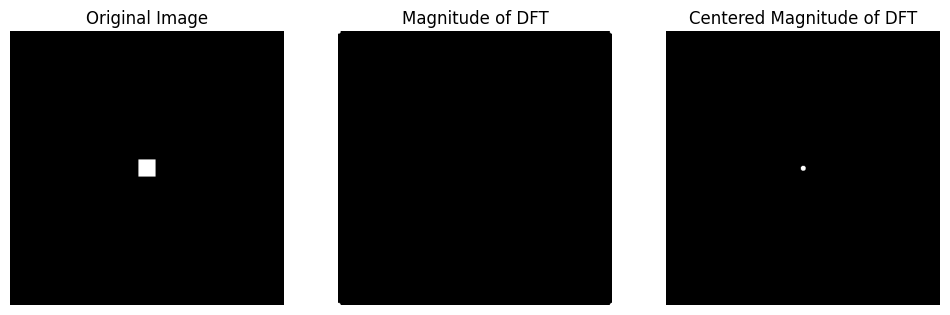

In [77]:

def manual_fftshift(arr):
    N, M = arr.shape
    return np.roll(np.roll(arr, N // 2, axis=0), M // 2, axis=1)


img_size = 512
square_size = 32

image = np.zeros((img_size, img_size), dtype=np.uint8)

top_left_corner = (img_size - square_size) // 2

image[top_left_corner:top_left_corner + square_size, top_left_corner:top_left_corner + square_size] = 255

real_Fuv, imag_Fuv = fft2D(512, 512, real_part, imag_part, 1)

magnitude = np.sqrt(real_Fuv**2 + imag_Fuv**2)

c = 1  
transformed_magnitude = c * np.log(1 + magnitude)

centered_magnitude = manual_fftshift(transformed_magnitude)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed_magnitude, cmap='gray')
plt.title('Magnitude of DFT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(centered_magnitude, cmap='gray')
plt.title('Centered Magnitude of DFT')
plt.axis('off')

plt.show()




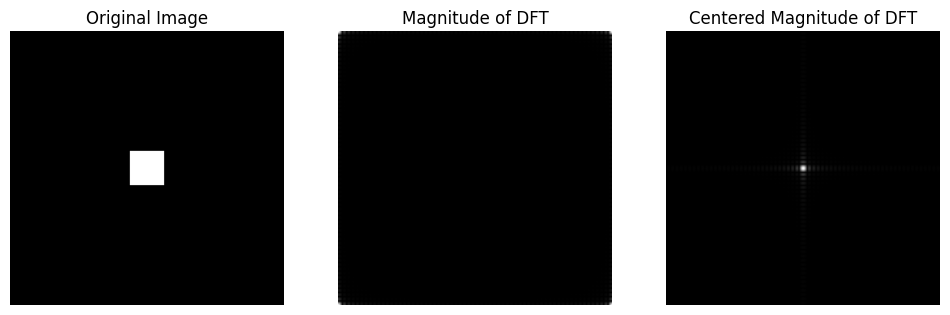

In [75]:

img_size = 512
square_size = 64

image = np.zeros((img_size, img_size), dtype=np.uint8)

top_left_corner = (img_size - square_size) // 2

image[top_left_corner:top_left_corner + square_size, top_left_corner:top_left_corner + square_size] = 255

real_Fuv, imag_Fuv = fft2D(512, 512, real_part, imag_part, 1)

magnitude = np.sqrt(real_Fuv**2 + imag_Fuv**2)

c = 1  
transformed_magnitude = c * np.log(1 + magnitude)

centered_magnitude = manual_fftshift(transformed_magnitude)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed_magnitude, cmap='gray')
plt.title('Magnitude of DFT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(centered_magnitude, cmap='gray')
plt.title('Centered Magnitude of DFT')
plt.axis('off')

plt.show()



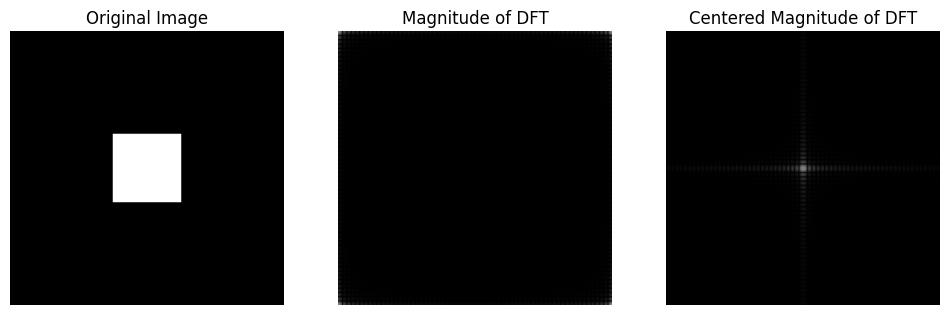

In [ ]:

img_size = 512
square_size = 128

image = np.zeros((img_size, img_size), dtype=np.uint8)

top_left_corner = (img_size - square_size) // 2

image[top_left_corner:top_left_corner + square_size, top_left_corner:top_left_corner + square_size] = 255

real_Fuv, imag_Fuv = fft2D(512, 512, real_part, imag_part, 1)

magnitude = np.sqrt(real_Fuv**2 + imag_Fuv**2)

c = 1  
transformed_magnitude = c * np.log(1 + magnitude)

centered_magnitude = manual_fftshift(transformed_magnitude)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed_magnitude, cmap='gray')
plt.title('Magnitude of DFT')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(centered_magnitude, cmap='gray')
plt.title('Centered Magnitude of DFT')
plt.axis('off')

plt.show()



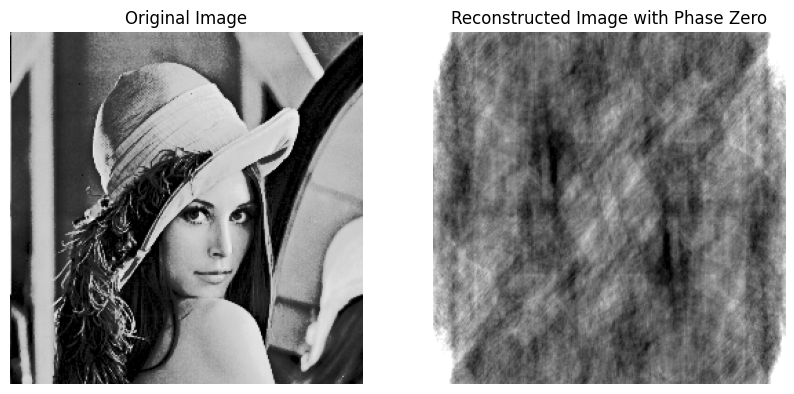

In [ ]:
img = Image.open('lenna.pgm')  

img_array = np.array(img)

real_Fuv, imag_Fuv = fft2D(img_array.shape[0], img_array.shape[1], img_array.astype(float), np.zeros_like(img_array, dtype=float), 1)

magnitude = np.sqrt(real_Fuv**2 + imag_Fuv**2)
real_Fuv_phase_zero = magnitude
imag_Fuv_phase_zero = np.zeros_like(magnitude)

reconstructed_real, _ = fft2D(img_array.shape[0], img_array.shape[1], real_Fuv_phase_zero, imag_Fuv_phase_zero, -1)

reconstructed_img_array_phase_zero = np.clip(np.round(reconstructed_real), 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img_array_phase_zero, cmap='gray')
plt.title('Reconstructed Image with Phase Zero')
plt.axis('off')

plt.show()


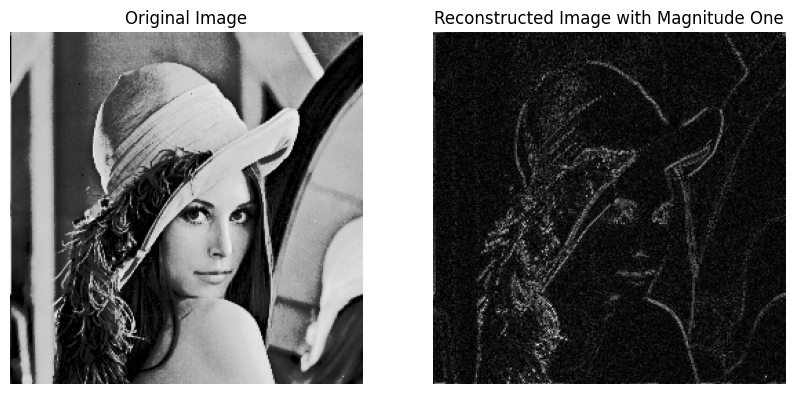

In [ ]:

real_Fuv, imag_Fuv = fft2D(img_array.shape[0], img_array.shape[1], img_array.astype(float), np.zeros_like(img_array, dtype=float), 1)
phase = np.arctan2(imag_Fuv, real_Fuv)
real_Fuv_unit_mag = np.cos(phase)
imag_Fuv_unit_mag = np.sin(phase)
reconstructed_real_unit_mag, reconstructed_imag_unit_mag = fft2D(img_array.shape[0], img_array.shape[1], real_Fuv_unit_mag, imag_Fuv_unit_mag, -1)
reconstructed_img_unit_mag = np.sqrt(reconstructed_real_unit_mag**2 + reconstructed_imag_unit_mag**2)
reconstructed_img_unit_mag = (reconstructed_img_unit_mag - np.min(reconstructed_img_unit_mag)) / (np.max(reconstructed_img_unit_mag) - np.min(reconstructed_img_unit_mag))
reconstructed_img_unit_mag = (reconstructed_img_unit_mag * 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img_unit_mag, cmap='gray')
plt.title('Reconstructed Image with Magnitude One')
plt.axis('off')

plt.show()

